## Importing all the necessary libraries to get started with the Data Wrangling and Analysis Part

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
!pip install openpyxl
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 242 kB 775 kB/s            
/kaggle/input/exl-eq/New_customer_list_data.xlsx
/kaggle/input/exl-eq/Data_Dictionary.xlsx
/kaggle/input/exl-eq/Historical_data.xlsx


## Reading All the given Data

In [2]:
data_description = pd.read_excel(r'../input/exl-eq/Data_Dictionary.xlsx', engine='openpyxl')
data_description

,column,description
0,customer_id,unique identifier for each customer (primary key)
1,customer_age,age of the customer
2,job_type,type of job
3,marital,marital status
4,education,highest educational qualification
5,default,delinquency status
6,balance,current account balance
7,housing_loan,flag indicating customers with home loan
8,personal_loan,flag indicating customers with personal loan
9,communication_type,mode of communication of the previous campaign


In [3]:
train_path = '../input/exl-eq/Historical_data.xlsx'
test_path = '../input/exl-eq/New_customer_list_data.xlsx'

train = pd.read_excel(train_path, engine='openpyxl')
test = pd.read_excel(test_path, engine='openpyxl')

train['term_deposit_subscribed'].values
train.sample(7)

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
22923,id_34756,36.0,management,married,tertiary,no,1016.0,no,no,unknown,9,jun,866,1.0,0,unknown,0
7249,id_21143,34.0,management,single,tertiary,no,133.0,yes,no,cellular,12,oct,741,3.0,2,failure,1
23247,id_13616,23.0,admin.,single,secondary,no,-331.0,yes,no,unknown,19,may,887,3.0,0,unknown,0
22608,id_11975,52.0,management,divorced,primary,no,-5.0,no,no,unknown,6,may,900,1.0,0,unknown,0
19530,id_35953,28.0,technician,single,tertiary,no,4.0,no,no,cellular,22,aug,792,2.0,0,unknown,0
12287,id_24091,35.0,services,single,unknown,no,1605.0,yes,no,unknown,17,jun,858,6.0,0,unknown,0
6766,id_23566,34.0,blue-collar,married,primary,no,506.0,yes,yes,cellular,15,may,891,1.0,0,unknown,0


In [4]:
test.sample(7)

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
2235,id_16247,37.0,management,married,tertiary,no,NaN,yes,no,unknown,883,23,may,4.0,0,unknown
5737,id_22360,49.0,blue-collar,divorced,primary,no,2264.0,yes,no,unknown,885,21,may,3.0,0,unknown
4370,id_40163,38.0,technician,divorced,secondary,no,673.0,yes,no,cellular,817,28,jul,2.0,0,unknown
431,id_23749,25.0,management,single,tertiary,no,3108.0,yes,no,unknown,878,28,may,2.0,0,unknown
4428,id_11652,31.0,management,single,tertiary,no,438.0,yes,yes,cellular,891,15,may,3.0,0,unknown
4088,id_9967,38.0,blue-collar,married,secondary,no,-1.0,yes,no,cellular,893,13,may,3.0,2,failure
1453,id_27048,36.0,housemaid,married,tertiary,no,10.0,yes,no,cellular,836,9,jul,1.0,0,unknown


In [5]:
test_customer_id = test['customer_id'].values

## Obseving how much the data is Imbalanced

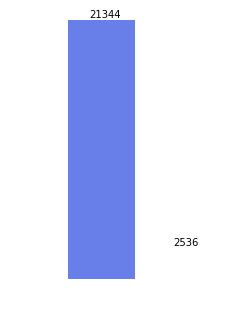

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(3,5))
ax = sns.countplot(train['term_deposit_subscribed'], palette=['#5271ff',"#ffffff"])
ax.tick_params(color='white', labelcolor='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')  
for spine in ax.spines.values():
    spine.set_edgecolor('white')
train['term_deposit_subscribed'].value_counts()

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+200))

plt.show()
plt.savefig('temp.png', transparent=True)

In [7]:
target = train['term_deposit_subscribed'].values

In [8]:
combo =pd.concat([train.drop('term_deposit_subscribed',axis=1),test],ignore_index=True,axis=0) 
combo

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_29917,52.0,technician,married,secondary,no,1764.0,yes,no,unknown,12,jun,863,2.0,0,unknown
31643,id_9275,50.0,management,divorced,tertiary,no,401.0,no,no,cellular,2,jul,843,1.0,6,failure
31644,id_16678,56.0,admin.,married,secondary,no,227.0,no,yes,cellular,17,nov,705,1.0,0,unknown
31645,id_26369,28.0,entrepreneur,married,secondary,no,NaN,yes,no,unknown,27,may,879,1.0,0,unknown


## Label Encoding the categorical columns and also mapping the columns where they have NaN vallues.

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combo['job_type'] = le.fit_transform(combo['job_type'])
combo['education'] = le.fit_transform(combo['education'])
combo['default'] = le.fit_transform(combo['default'])
combo['housing_loan'] = le.fit_transform(combo['housing_loan'])
combo['communication_type'] = le.fit_transform(combo['communication_type'])
combo['month'] = le.fit_transform(combo['month'])
combo['prev_campaign_outcome'] = le.fit_transform(combo['prev_campaign_outcome'])

In [10]:
combo.isnull().sum()

customer_id                     0
customer_age                  619
job_type                        0
marital                       150
education                       0
default                         0
balance                       399
housing_loan                    0
personal_loan                 149
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign      112
num_contacts_prev_campaign      0
prev_campaign_outcome           0
dtype: int64

In [11]:
marital_dict = {'married': 1, 'single': 2, 'divorced': 3}
combo['marital'] = combo['marital'].map(marital_dict)
combo['marital'].value_counts()

1.0    18945
2.0     8857
3.0     3695
Name: marital, dtype: int64

In [12]:
personal_loan_dict = {'no': 0, 'yes': 1}
combo['personal_loan'] = combo['personal_loan'].map(personal_loan_dict)
combo['personal_loan'].value_counts()

0.0    26463
1.0     5035
Name: personal_loan, dtype: int64

## Using Iterative Imputer along with Missing Value Indicator For Columns which have missing Values

In [13]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import MissingIndicator
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

Most of the times the missing values are not randomly distributed across observations but are distributed within one or more sub-samples. Therefore, missingness itself might be a good indicator to classify the labels

In [14]:
miss_indicator = MissingIndicator()
X_miss = miss_indicator.fit_transform(combo[['customer_age','marital','balance','personal_loan','num_contacts_in_campaign']])
X_miss.shape

(31647, 5)

In [15]:
itr_imputer = IterativeImputer(add_indicator=True) 
X = itr_imputer.fit_transform(combo.drop('customer_id',axis=1))
X.shape

(31647, 20)

In [16]:
combo[['ind_customer_age','ind_marital','ind_balance','ind_personal_loan','ind_num_contacts_in_campaign']] = X_miss
combo.iloc[:,1:21] = X
combo

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,...,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,ind_customer_age,ind_marital,ind_balance,ind_personal_loan,ind_num_contacts_in_campaign
0,id_32289,34.0,1.0,1.0,1.0,0.0,934.000000,0.0,1.000000,0.0,...,9.0,704.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,id_40992,41.0,1.0,1.0,0.0,0.0,1352.000000,1.0,0.000000,0.0,...,8.0,893.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,id_41178,57.0,1.0,1.0,0.0,0.0,495.000000,0.0,0.000000,0.0,...,1.0,796.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,id_35102,37.0,4.0,1.0,2.0,0.0,650.000000,1.0,0.152919,2.0,...,8.0,880.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
4,id_34750,29.0,9.0,1.0,1.0,0.0,265.000000,1.0,0.000000,0.0,...,1.0,795.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_29917,52.0,9.0,1.0,1.0,0.0,1764.000000,1.0,0.000000,2.0,...,6.0,863.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
31643,id_9275,50.0,4.0,3.0,2.0,0.0,401.000000,0.0,0.000000,0.0,...,5.0,843.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
31644,id_16678,56.0,0.0,1.0,1.0,0.0,227.000000,0.0,1.000000,0.0,...,9.0,705.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
31645,id_26369,28.0,2.0,1.0,1.0,0.0,956.062021,1.0,0.000000,2.0,...,8.0,879.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0


## Looking At the skewness of the Data

In [17]:
skew_df = combo.skew().T 
skew_df 

customer_age                     0.667011
job_type                         0.268420
marital                          0.989693
education                        0.195600
default                          7.365513
balance                          8.554004
housing_loan                    -0.238876
personal_loan                    1.860492
communication_type               0.765070
day_of_month                     0.091909
month                           -0.487749
last_contact_duration           -0.306062
num_contacts_in_campaign         5.007457
num_contacts_prev_campaign      45.833007
prev_campaign_outcome           -1.962596
ind_customer_age                 6.939058
ind_marital                     14.422360
ind_balance                      8.737036
ind_personal_loan               14.471370
ind_num_contacts_in_campaign    16.721021
dtype: float64

## Checking All the KDE Plots

  0%|          | 0/20 [00:00<?, ?it/s]

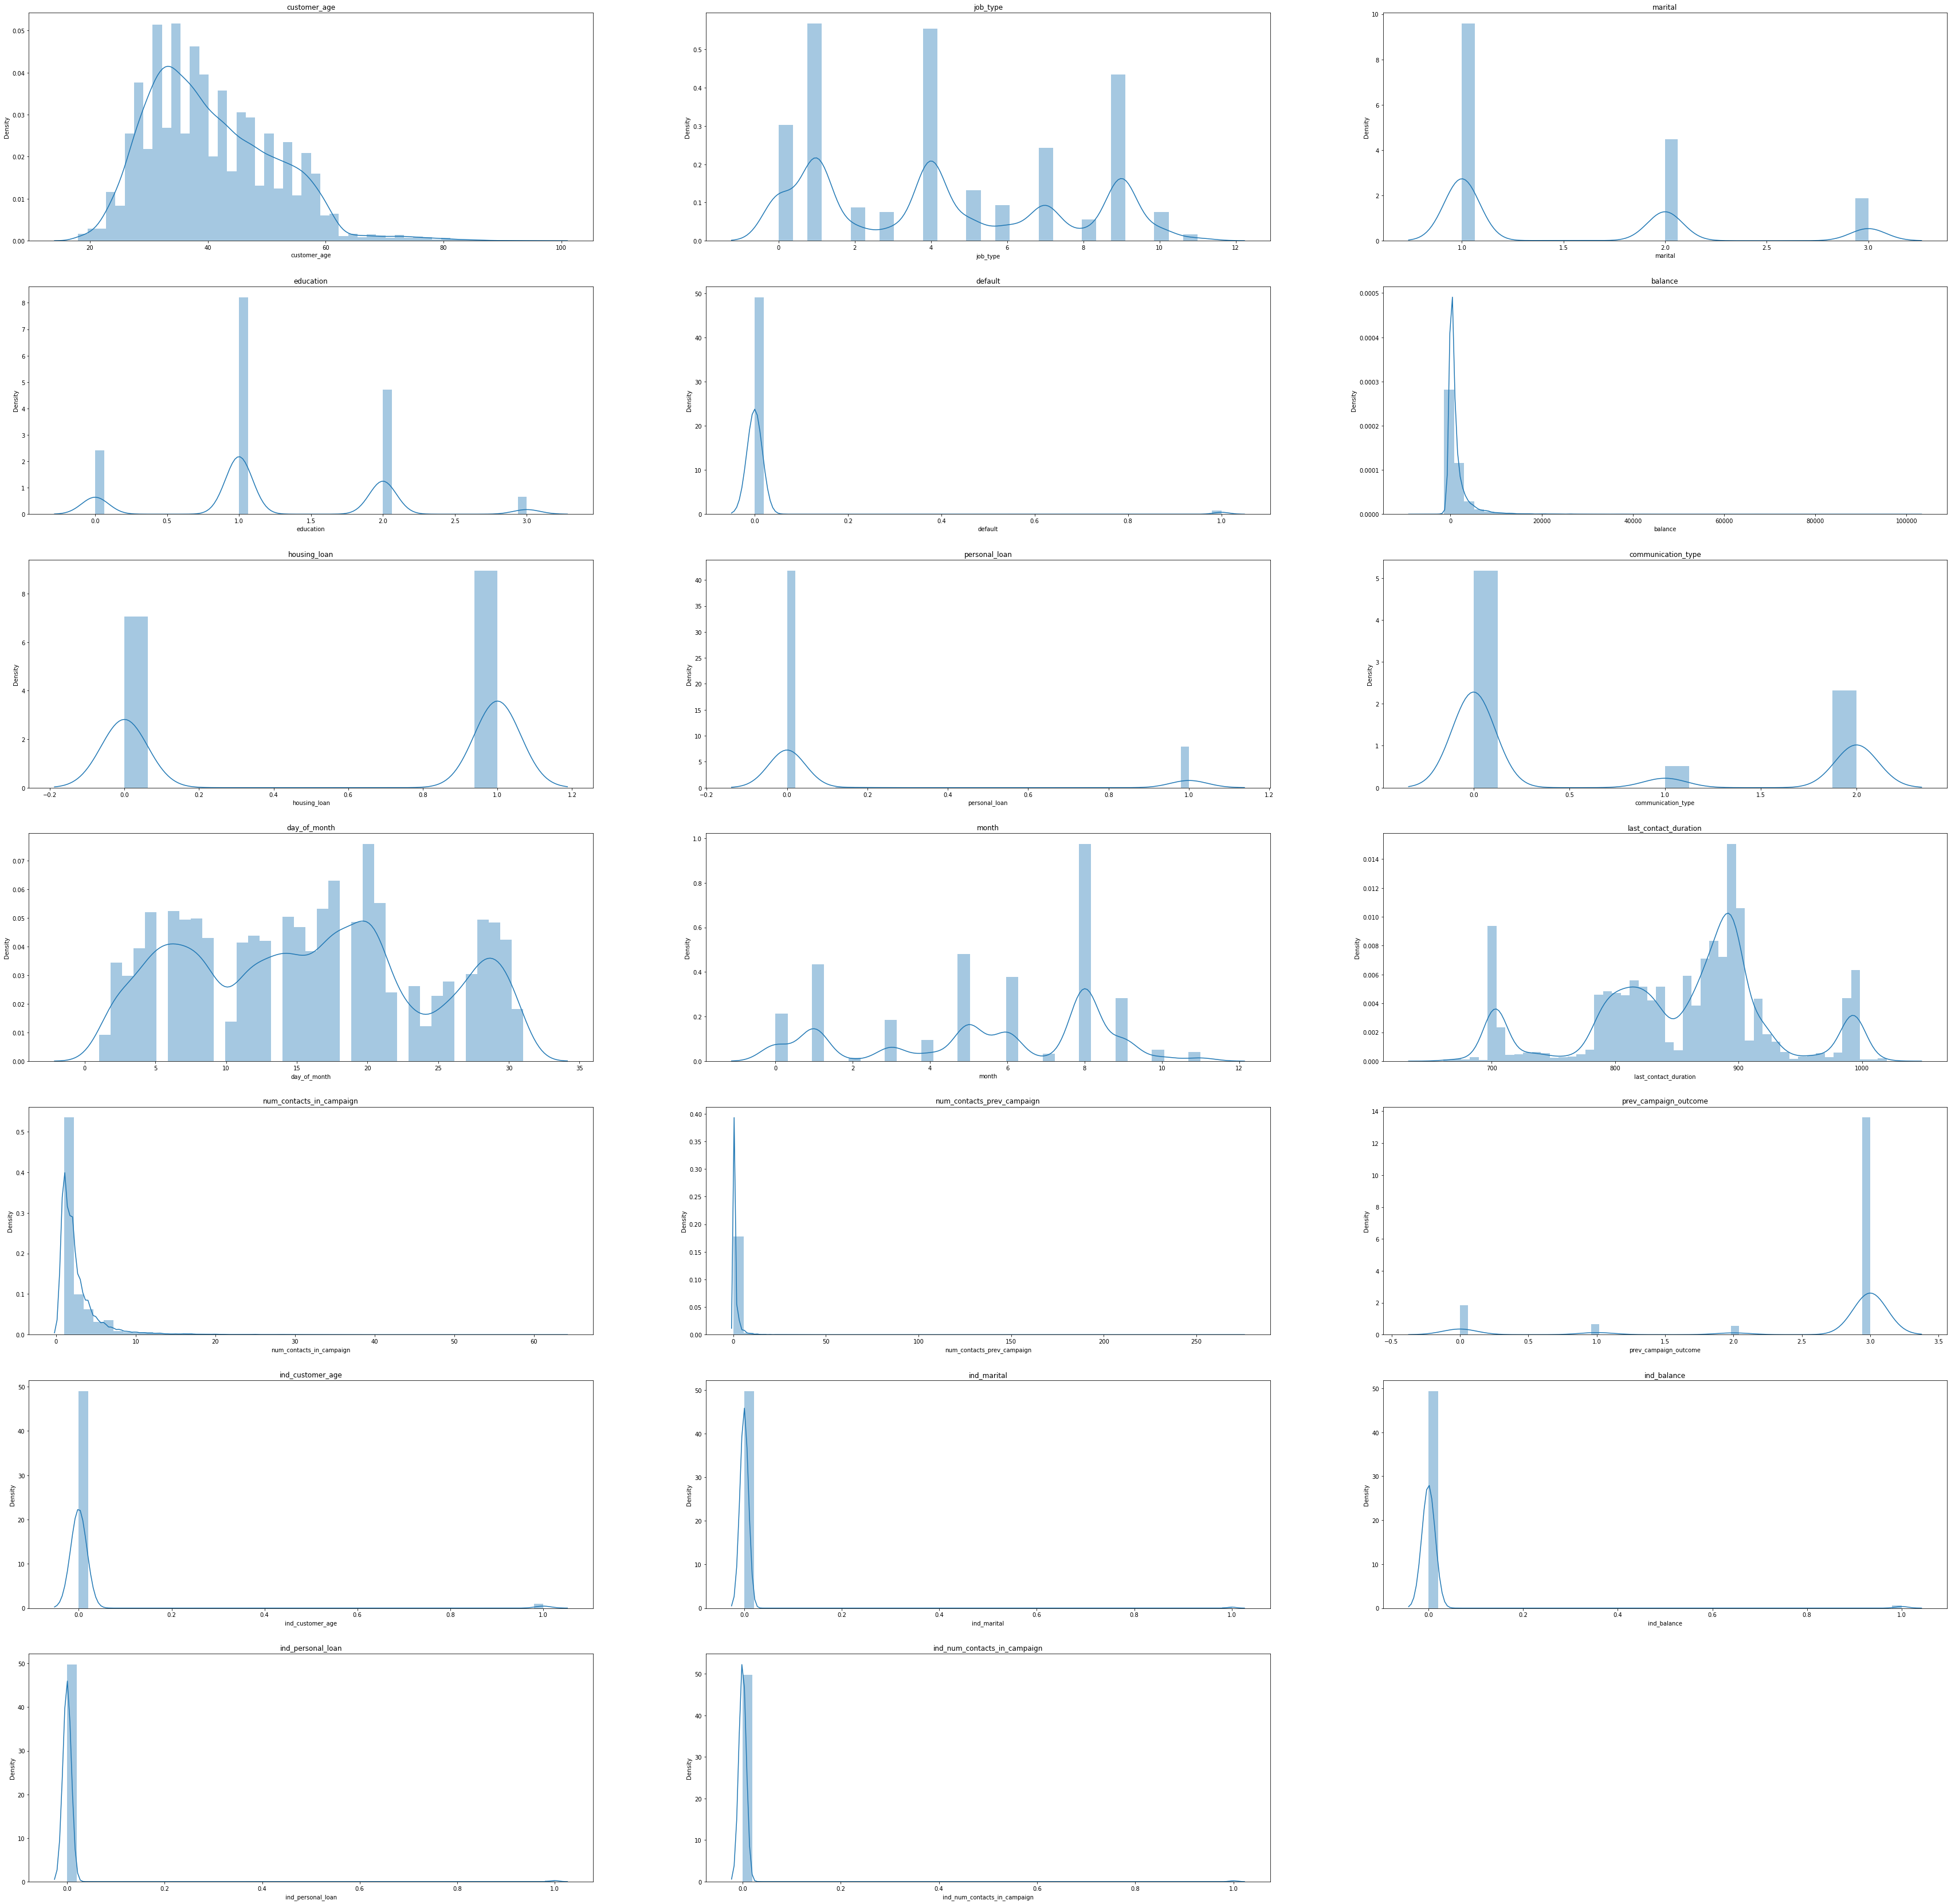

In [18]:
# looking at kdeplots of skewed column datas after applying transformation
plt.figure(figsize=(60,60)) 
for i in tqdm(range(len(combo.select_dtypes('float').columns))): 
  plt.subplot(7,3, i+1)
  sns.distplot(combo[combo.select_dtypes('float').columns[i]])
  plt.title(str(combo.select_dtypes('float').columns[i]))

## We have used Gaussian Mixture on two columns to ultimately bin them.

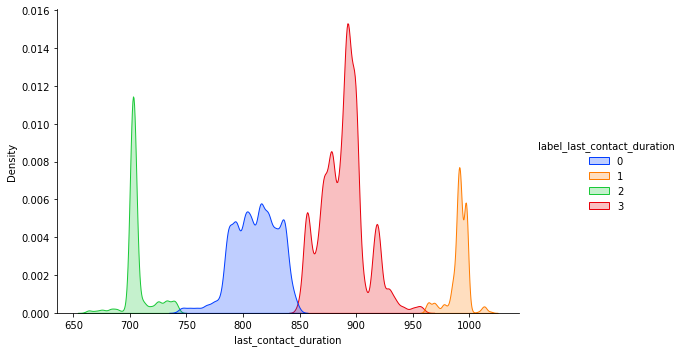

In [19]:
from sklearn.mixture import GaussianMixture
n_components = 4
gmm = GaussianMixture(n_components = n_components )
 
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(combo['last_contact_duration'].values.reshape(-1,1))
 
# Assign a label to each sample
labels = gmm.predict(combo['last_contact_duration'].values.reshape(-1,1))
combo['label_last_contact_duration']= labels
# plot three clusters in same plot
sns.displot(data=combo, x='last_contact_duration', hue='label_last_contact_duration', kind='kde', fill=True, palette=sns.color_palette('bright')[:n_components ], height=5, aspect=1.5)

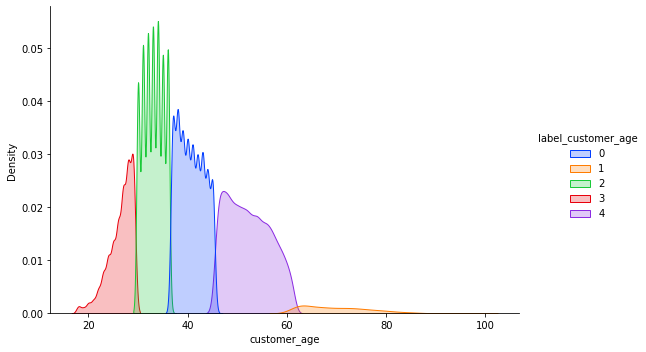

In [20]:
n_components = 5
gmm = GaussianMixture(n_components = n_components)
 
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(combo['customer_age'].values.reshape(-1,1))
 
# Assign a label to each sample
labels = gmm.predict(combo['customer_age'].values.reshape(-1,1))
combo['label_customer_age']= labels
# plot three clusters in same plot
sns.displot(data=combo, x='customer_age', hue='label_customer_age', kind='kde', fill=True, palette=sns.color_palette('bright')[:n_components], height=5, aspect=1.5)

## Checking the Pearson Correlation

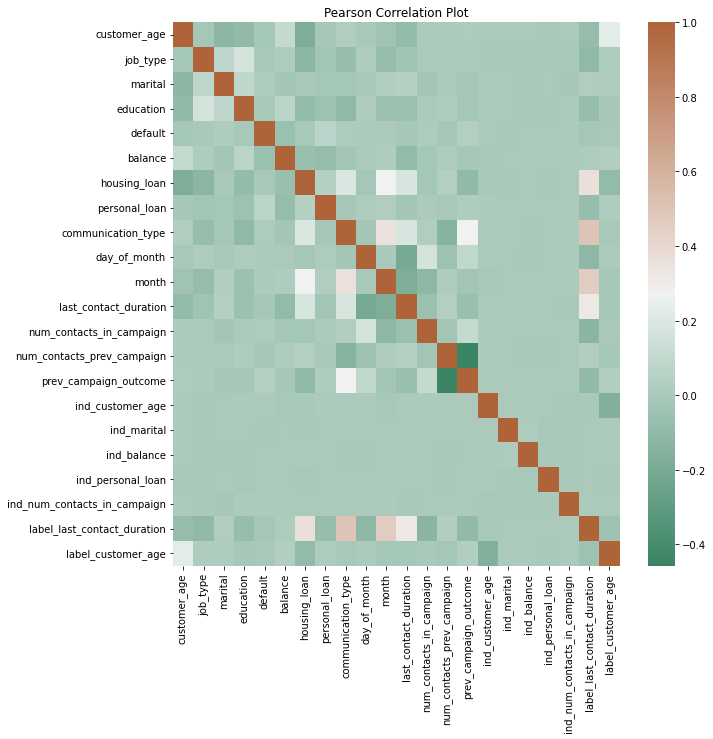

In [21]:
corr = combo.corr(method = 'pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr , cmap=sns.diverging_palette(150, 30, as_cmap=True))
plt.title('Pearson Correlation Plot')
plt.show()

## Checking the Spearman's Correlation

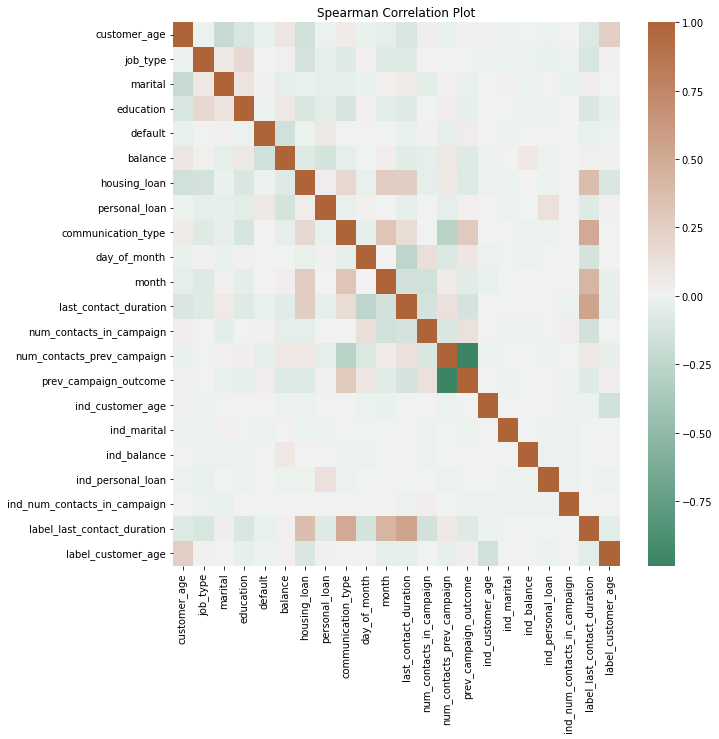

In [22]:
corr = combo.corr(method = 'spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corr , cmap=sns.diverging_palette(150, 30, as_cmap=True))
plt.title('Spearman Correlation Plot')
plt.show()

## Checking the Kendall's Correlation

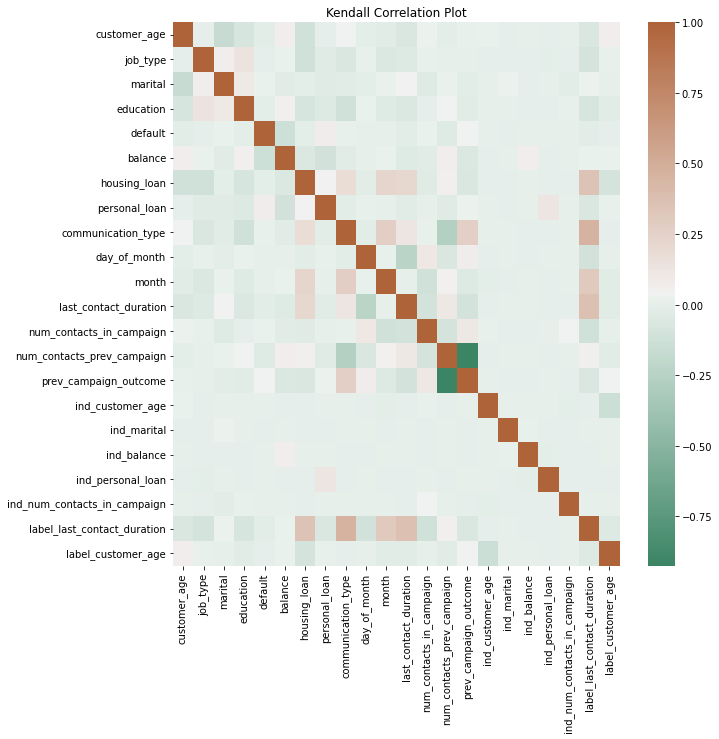

In [23]:
corr = combo.corr(method = 'kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr , cmap=sns.diverging_palette(150, 30, as_cmap=True))
plt.title('Kendall Correlation Plot')
plt.show()

## Selecting the numerical columns which don't have normal distribution and applying Quantile Transformer on them to make them normal 

In [24]:
num_col=['balance','customer_age','last_contact_duration'] # ,'num_contacts_in_campaign','num_contacts_prev_campaign'

  0%|          | 0/3 [00:00<?, ?it/s]

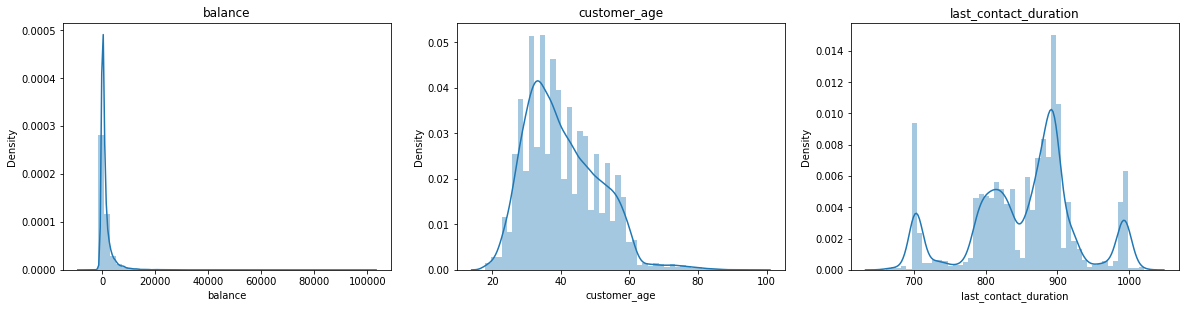

In [25]:
plt.figure(figsize=(20,10)) 
for i in tqdm(range(len(num_col))): 
  plt.subplot(2,3, i+1)
  sns.distplot(combo[num_col[i]])
  plt.title(str(num_col[i]))

  0%|          | 0/3 [00:00<?, ?it/s]

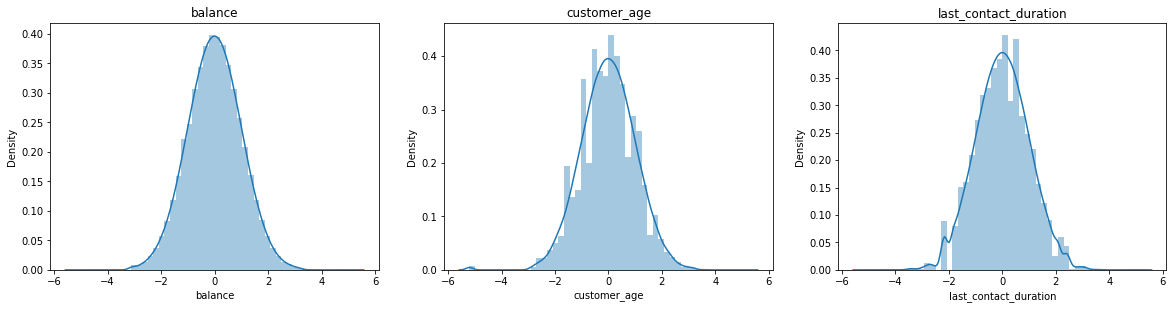

In [26]:
from sklearn.preprocessing import QuantileTransformer

for col in num_col:
  quantile = QuantileTransformer(output_distribution='normal')
  combo[col] = quantile.fit_transform(combo[col].values.reshape(-1, 1))
    
plt.figure(figsize=(20,10)) 
for i in tqdm(range(len(num_col))): 
  plt.subplot(2,3, i+1)
  sns.distplot(combo[num_col[i]])
  plt.title(str(num_col[i]))

In [27]:
# from sklearn.mixture import GaussianMixture
# n_components = 2
# gmm = GaussianMixture(n_components = n_components )
 
# # Fit the GMM model for the dataset
# # which expresses the dataset as a
# # mixture of 3 Gaussian Distribution
# gmm.fit(combo['num_contacts_in_campaign'].values.reshape(-1,1))
 
# # Assign a label to each sample
# labels = gmm.predict(combo['num_contacts_in_campaign'].values.reshape(-1,1))
# combo['label_num_contacts_in_campaign']= labels
# # plot three clusters in same plot
# # sns.displot(data=combo, x='num_contacts_in_campaign', hue='label_num_contacts_in_campaign', kind='kde', fill=True, palette=sns.color_palette('bright')[:n_components ], height=5, aspect=1.5)

In [28]:
# from sklearn.mixture import GaussianMixture
# n_components = 2
# gmm = GaussianMixture(n_components = n_components )
 
# # Fit the GMM model for the dataset
# # which expresses the dataset as a
# # mixture of 3 Gaussian Distribution
# gmm.fit(combo['num_contacts_prev_campaign'].values.reshape(-1,1))
 
# # Assign a label to each sample
# labels = gmm.predict(combo['num_contacts_prev_campaign'].values.reshape(-1,1))
# combo['label_num_contacts_prev_campaign']= labels
# # plot three clusters in same plot
# sns.displot(data=combo, x='num_contacts_prev_campaign', hue='label_num_contacts_prev_campaign', kind='kde', fill=True, palette=sns.color_palette('bright')[:n_components ], height=5, aspect=1.5)

In [29]:
combo = combo.drop(['customer_id'],axis=1)  # ,'day_of_month'

In [30]:
combo

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,...,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,ind_customer_age,ind_marital,ind_balance,ind_personal_loan,ind_num_contacts_in_campaign,label_last_contact_duration,label_customer_age
0,-0.461215,1.0,1.0,1.0,0.0,0.403356,0.0,1.000000,0.0,18.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
1,0.188033,1.0,1.0,0.0,0.0,0.635158,1.0,0.000000,0.0,13.0,...,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3,0
2,1.453280,1.0,1.0,0.0,0.0,0.036391,0.0,0.000000,0.0,18.0,...,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,4
3,-0.149853,4.0,1.0,2.0,0.0,0.191439,1.0,0.152919,2.0,26.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3,0
4,-1.140077,9.0,1.0,1.0,0.0,-0.276998,1.0,0.000000,0.0,19.0,...,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.987652,9.0,1.0,1.0,0.0,0.807032,1.0,0.000000,2.0,12.0,...,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3,4
31643,0.835558,4.0,3.0,2.0,0.0,-0.071571,0.0,0.000000,0.0,2.0,...,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
31644,1.346386,0.0,1.0,1.0,0.0,-0.338834,0.0,1.000000,0.0,17.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2,4
31645,-1.295363,2.0,1.0,1.0,0.0,0.419099,1.0,0.000000,2.0,27.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3,3


##  Modelling

In [31]:
train = combo.head(train.shape[0])
test = combo.tail(test.shape[0]).reset_index().drop('index',axis=1)

In [32]:
X = train.values
y = target

test = test.values

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2084)

# Trying Out Different Models

##  XGB

In [34]:
xgb_params = {   'random_state':42,'scale_pos_weight': 8.416403785488958,'n_estimators':150,
                'early_stopping_rounds':300,'eval_metric':'auc','verbose':1000 , 
                'learning_rate': 0.0463581661788896,'reg_lambda': 1.8577901848649363,
                'reg_alpha': 8.487064649268152e-06,'subsample': 0.7256082597999299,
                'colsample_bytree': 0.8923416359976979,'max_depth': 6    }  

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
from sklearn.metrics import classification_report

xgbc = XGBClassifier(**xgb_params)

xgbc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

y_test_preds_proba_xgbc = xgbc.predict_proba(x_test)
y_test_preds_xgbc = xgbc.predict(x_test)
print()     
print('ROC-AUC Score   '+str(roc_auc_score(y_test, y_test_preds_proba_xgbc[:,1])))
print()
print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_xgbc)))
print()
print('F1 Score   '+str(f1_score(y_test, y_test_preds_xgbc)))
print()
print(classification_report(y_test, y_test_preds_xgbc))

[11:26:39] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-auc:0.78538	validation_1-auc:0.74935
[1]	validation_0-auc:0.81097	validation_1-auc:0.78118
[2]	validation_0-auc:0.82368	validation_1-auc:0.79194
[3]	validation_0-auc:0.82896	validation_1-auc:0.79261
[4]	validation_0-auc:0.82880	validation_1-auc:0.79113
[5]	validation_0-auc:0.82884	validation_1-auc:0.79058
[6]	validation_0-auc:0.82875	validation_1-auc:0.78807
[7]	validation_0-auc:0.83127	validation_1-auc:0.79119
[8]	validation_0-auc:0.83231	validation_1-auc:0.79298
[9]	validation_0-auc:0.83458	validation_1-auc:0.79376
[10]	validation_0-auc:0.83590	validation_1-auc:0.79510
[11]	validation_0-auc:

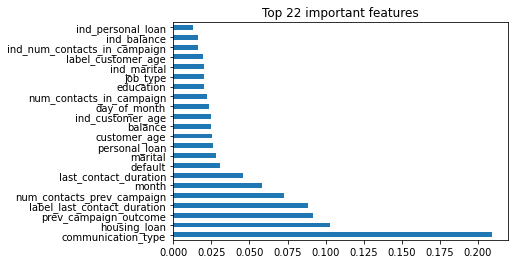

In [36]:
feat_importances = pd.Series(xgbc.feature_importances_, index=train.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.title("Top 22 important features")
plt.show()

## CBC

In [37]:
cbc_params =   {'learning_rate': 0.03245016310170749,
                'reg_lambda': 0.29068861476996716,
                'subsample': 0.6623171683658611,
                'max_depth': 5,
                'random_state':42,
                'n_estimators':500,
                'auto_class_weights':'Balanced',
                'eval_metric':'AUC'}

In [38]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(**cbc_params)

cbc.fit(x_train,y_train,eval_set=(x_test,y_test))

y_test_preds_proba_cbc = cbc.predict_proba(x_test)
y_test_preds_cbc = cbc.predict(x_test)
print()   
print('ROC-AUC Score   '+str(roc_auc_score(y_test, y_test_preds_proba_cbc[:,1])))
print()
print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_cbc)))
print()
print('F1 Score   '+str(f1_score(y_test, y_test_preds_cbc)))
print()
print(classification_report(y_test, y_test_preds_cbc))

0:	test: 0.7414580	best: 0.7414580 (0)	total: 54.3ms	remaining: 27.1s
1:	test: 0.7479575	best: 0.7479575 (1)	total: 59.5ms	remaining: 14.8s
2:	test: 0.7555377	best: 0.7555377 (2)	total: 63.9ms	remaining: 10.6s
3:	test: 0.7666845	best: 0.7666845 (3)	total: 68.4ms	remaining: 8.49s
4:	test: 0.7633894	best: 0.7666845 (3)	total: 73.2ms	remaining: 7.24s
5:	test: 0.7659485	best: 0.7666845 (3)	total: 77.9ms	remaining: 6.41s
6:	test: 0.7763940	best: 0.7763940 (6)	total: 82.7ms	remaining: 5.82s
7:	test: 0.7745237	best: 0.7763940 (6)	total: 87.4ms	remaining: 5.38s
8:	test: 0.7739062	best: 0.7763940 (6)	total: 92ms	remaining: 5.02s
9:	test: 0.7742350	best: 0.7763940 (6)	total: 96.7ms	remaining: 4.74s
10:	test: 0.7726144	best: 0.7763940 (6)	total: 101ms	remaining: 4.5s
11:	test: 0.7719248	best: 0.7763940 (6)	total: 107ms	remaining: 4.33s
12:	test: 0.7715173	best: 0.7763940 (6)	total: 111ms	remaining: 4.16s
13:	test: 0.7718703	best: 0.7763940 (6)	total: 116ms	remaining: 4.03s
14:	test: 0.7719408	bes

## LGBM

In [39]:
lgb_params = { 'objective': 'binary', 'metric': 'AUC', 'verbosity': -1, 'n_estimators':36,
             'boosting_type': 'gbdt', 'seed': 42, 'scale_pos_weight': 8.416403785488958, 
             'feature_pre_filter': False, 'lambda_l1': 0.1824481747502035, 
             'lambda_l2': 5.709517538288883, 'num_leaves': 171, 
             'feature_fraction': 0.8, 'bagging_fraction': 1.0, 
             'bagging_freq': 0, 'min_child_samples': 25 }

In [40]:
import lightgbm as lgb
lgc = lgb.LGBMClassifier(**lgb_params)


lgc.fit(x_train,y_train,eval_set=[[x_train,y_train],[x_test,y_test]])

y_test_preds_proba_lgc = lgc.predict_proba(x_test)
y_test_preds_lgc = lgc.predict(x_test)
print()     
print('ROC-AUC Score   '+str(roc_auc_score(y_test, y_test_preds_proba_lgc[:,1])))
print()
print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_lgc)))
print()
print('F1 Score   '+str(f1_score(y_test, y_test_preds_lgc)))
print()
print(classification_report(y_test, y_test_preds_lgc))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l2 is set=5.709517538288883, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.709517538288883
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=0.1824481747502035, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1824481747502035
[1]	training's auc: 0.832867	valid_1's auc: 0.778936
[2]	training's auc: 0.862897	valid_1's auc: 0.786712
[3]	training's auc: 0.876859	valid_1's auc: 0.789537
[4]	training's auc: 0.890181	valid_1's auc: 0.792299
[5]	training's auc: 0.8981	valid_1's auc: 0.796089
[6]	training's auc: 0.902533	valid_1's auc: 0.79633
[7]	training's auc: 0.908291	valid_1's auc: 0.798968
[8]	training's auc

In [41]:
# import optuna
# def run(trial):
# #     fold = 0
#     learning_rate = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
#     reg_lambda = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
#     reg_alpha = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
#     subsample = trial.suggest_float("subsample", 0.1, 1.0)
#     colsample_bytree = trial.suggest_float("colsample_bytree", 0.1, 1.0)
#     max_depth = trial.suggest_int("max_depth", 1, 7)

#     model = XGBClassifier(
#         random_state=42,
#         scale_pos_weight= 8.416403785488958,
#         n_estimators=109,
#         learning_rate=learning_rate,
#         reg_lambda=reg_lambda,
#         reg_alpha=reg_alpha,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree,
#         max_depth=max_depth,
#     )
#     model.fit(x_train, y_train, early_stopping_rounds=300, eval_set=[(x_test, y_test)],eval_metric=['auc'], verbose=1000)
#     preds_valid = model.predict_proba(x_test)
#     check_arr =[]
#     for i in range(preds_valid.shape[0]):
#         check_arr.append(preds_valid[i][1])
#     score = roc_auc_score(y_test, check_arr)
#     return score

In [42]:
# study = optuna.create_study(direction="maximize")
# study.optimize(run, n_trials=10)

In [43]:
# study.best_params

## RF

In [44]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(max_depth = 5, n_estimators=100, class_weight='balanced')
# rf.fit(x_train, y_train)

# y_test_preds_proba_rf = rf.predict_proba(x_test)
# y_test_preds_rf = cbc.predict(x_test)
# print()   
# print('ROC-AUC Score   '+str(roc_auc_score(y_test, y_test_preds_proba_rf[:,1])))
# print()
# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_rf)))
# print()
# print('F1 Score   '+str(f1_score(y_test, y_test_preds_rf)))
# print()
# print(classification_report(y_test, y_test_preds_rf))

In [45]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
# rf.fit(x_train, y_train)

# y_test_preds_proba_rf = rf.predict_proba(x_test)
# y_test_preds_rf = cbc.predict(x_test)
# print()   
# print('ROC-AUC Score   '+str(roc_auc_score(y_test, y_test_preds_proba_rf[:,1])))
# print()
# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_rf)))
# print()
# print('F1 Score   '+str(f1_score(y_test, y_test_preds_rf)))
# print()
# print(classification_report(y_test, y_test_preds_rf))

## KNN

In [46]:
# import cuml
# import imblearn
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# from cuml.neighbors import KNeighborsClassifier
# # knn = KNeighborsClassifier()

# oversample = SMOTE()
# undersample = RandomUnderSampler()

# x_train,y_train = oversample.fit_resample(x_train,y_train)

In [47]:
# acc = []
# # Will take some time
# from sklearn import metrics
# for i in range(1,40):
#     neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
#     yhat = neigh.predict(x_test)
#     acc.append(metrics.accuracy_score(y_test, yhat))
    
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
#          marker='o',markerfacecolor='red', markersize=10)
# plt.title('accuracy vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Accuracy')
# print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

## SVC

In [48]:
# import cuml
# import imblearn
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# from cuml.svm import SVC
# svc = SVC()

# oversample = SMOTE()
# undersample = RandomUnderSampler()

# x_train,y_train = undersample.fit_resample(x_train,y_train)

# svc.fit(x_train,y_train)

# y_test_preds = svc.predict(x_test)
    
# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds)))
# print('F1 Score   '+str(f1_score(y_test, y_test_preds)))

# print(classification_report(y_test, y_test_preds))

## PyTorch Tabnet

In [49]:
# import imblearn
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# oversample = SMOTE()
# undersample = RandomUnderSampler()

# x_train,y_train = oversample.fit_resample(x_train,y_train)

# from pytorch_tabnet.tab_model import TabNetClassifier

# classifier = TabNetClassifier(verbose=0,seed=42)
# classifier.fit(X_train=x_train, y_train=y_train,
#                patience=5,max_epochs=100,
#                eval_metric=['auc'])

# y_test_preds_proba_tab = classifier.predict_proba(x_test)[:,1]
# y_test_preds_tab = classifier.predict(x_test)

# print()     
# print('ROC-AUC Score   '+str(roc_auc_score(y_test, y_test_preds_proba_tab)))
# print()
# print('Accuracy Score   '+str(accuracy_score(y_test, y_test_preds_tab)))
# print()
# print('F1 Score   '+str(f1_score(y_test, y_test_preds_tab)))
# print()
# print(classification_report(y_test, y_test_preds_lgc))

## We finalised on Blending the best models to get the best results.

 ## Blend

In [50]:
print( 'ROC-AUC Score   '+str(roc_auc_score(y_test, (0.8*(np.array(y_test_preds_proba_cbc[:,1])) + 0.2*(np.array(y_test_preds_proba_xgbc[:,1]))))))
print() 
blend_preds = (0.8*(np.array(y_test_preds_proba_cbc[:,1])) + 0.2*(np.array(y_test_preds_proba_xgbc[:,1])))
blend_preds =  [1 if x >=0.55  else 0 for x in blend_preds]

print('Accuracy Score   '+str(accuracy_score(y_test, blend_preds)))
print() 
print('F1 Score   '+str(f1_score(y_test, blend_preds)))
print()
print(classification_report(y_test, blend_preds ))

ROC-AUC Score   0.8119136030915046

Accuracy Score   0.858249581239531

F1 Score   0.473970473970474

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4269
           1       0.39      0.60      0.47       507

    accuracy                           0.86      4776
   macro avg       0.67      0.75      0.70      4776
weighted avg       0.89      0.86      0.87      4776



In [51]:
print( 'ROC-AUC Score   '+str(roc_auc_score(y_test, (0.6*(np.array(y_test_preds_proba_cbc[:,1])) + 0.4*(np.array(y_test_preds_proba_xgbc[:,1]))))))
print() 
blend_preds = (0.6*(np.array(y_test_preds_proba_cbc[:,1])) + 0.4*(np.array(y_test_preds_proba_xgbc[:,1])))
blend_preds =  [1 if x >=0.55  else 0 for x in blend_preds]

print('Accuracy Score   '+str(accuracy_score(y_test, blend_preds)))
print() 
print('F1 Score   '+str(f1_score(y_test, blend_preds)))
print()
print(classification_report(y_test, blend_preds ))

ROC-AUC Score   0.8131961857028077

Accuracy Score   0.8607621440536013

F1 Score   0.4767899291896145

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      4269
           1       0.40      0.60      0.48       507

    accuracy                           0.86      4776
   macro avg       0.67      0.74      0.70      4776
weighted avg       0.89      0.86      0.87      4776



In [52]:
print( 'ROC-AUC Score   '+str(roc_auc_score(y_test, (0.45*(np.array(y_test_preds_proba_cbc[:,1])) + 0.4*(np.array(y_test_preds_proba_xgbc[:,1])) + 0.15000000000000002*(np.array(y_test_preds_proba_lgc[:,1])) ))))
print() 
blend_preds = (0.45*(np.array(y_test_preds_proba_cbc[:,1])) + 0.4*(np.array(y_test_preds_proba_xgbc[:,1])) + 0.15000000000000002*(np.array(y_test_preds_proba_lgc[:,1])) )
blend_preds =  [1 if x >=0.55  else 0 for x in blend_preds]

print('Accuracy Score   '+str(accuracy_score(y_test, blend_preds)))
print() 
print('F1 Score   '+str(f1_score(y_test, blend_preds)))
print()
print(classification_report(y_test, blend_preds ))

ROC-AUC Score   0.8146635784886502

Accuracy Score   0.8666247906197655

F1 Score   0.4858757062146893

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4269
           1       0.41      0.59      0.49       507

    accuracy                           0.87      4776
   macro avg       0.68      0.75      0.70      4776
weighted avg       0.89      0.87      0.88      4776



In [53]:
print( 'ROC-AUC Score   '+str(roc_auc_score(y_test, (0.25*(np.array(y_test_preds_proba_cbc[:,1])) + 0.65*(np.array(y_test_preds_proba_xgbc[:,1])) + 0.1*(np.array(y_test_preds_proba_lgc[:,1])) ))))
print() 
blend_preds = (0.25*(np.array(y_test_preds_proba_cbc[:,1])) + 0.65*(np.array(y_test_preds_proba_xgbc[:,1])) + 0.1*(np.array(y_test_preds_proba_lgc[:,1])) )
blend_preds =  [1 if x >=0.55  else 0 for x in blend_preds]

print('Accuracy Score   '+str(accuracy_score(y_test, blend_preds)))
print() 
print('F1 Score   '+str(f1_score(y_test, blend_preds)))
print()
print(classification_report(y_test, blend_preds ))

ROC-AUC Score   0.8145744075794349

Accuracy Score   0.865787269681742

F1 Score   0.48181083265966046

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      4269
           1       0.41      0.59      0.48       507

    accuracy                           0.87      4776
   macro avg       0.68      0.74      0.70      4776
weighted avg       0.89      0.87      0.88      4776



## We devised a method to get the best blending coefficients for different models.

In [54]:
fracs = np.linspace(0,1,num = 21)
frac_lgc=[]
frac_xgbc=[]
frac_cbc=[]
blend_score = []
for i in tqdm(fracs):
    for j in fracs:
        for k in fracs:
            if (i+j+k) ==1:
                frac_lgc.append(str(i)+str('*lgc'))
                frac_xgbc.append(str(j)+str('*xgbc'))
                frac_cbc.append(str(k)+str('*cbc'))
                blend_score.append(roc_auc_score(y_test, (k*(np.array(y_test_preds_proba_cbc[:,1])) + j*(np.array(y_test_preds_proba_xgbc[:,1])) + i*(np.array(y_test_preds_proba_lgc[:,1])) )))
            else:
                pass
                
blend_df = pd.DataFrame({'frac_lgc':frac_lgc,'frac_xgbc':frac_xgbc,'frac_cbc':frac_cbc,'blend_score':blend_score})
blend_df = blend_df.sort_values(by=['blend_score'], ascending=False)
blend_df

  0%|          | 0/21 [00:00<?, ?it/s]

,frac_lgc,frac_xgbc,frac_cbc,blend_score
86,0.2*lgc,0.5*xgbc,0.30000000000000004*cbc,0.814935
85,0.2*lgc,0.45*xgbc,0.35000000000000003*cbc,0.814885
101,0.25*lgc,0.45*xgbc,0.30000000000000004*cbc,0.814880
87,0.2*lgc,0.55*xgbc,0.25*cbc,0.814871
100,0.25*lgc,0.4*xgbc,0.35000000000000003*cbc,0.814844
...,...,...,...,...
212,0.9*lgc,0.05*xgbc,0.05*cbc,0.807865
213,0.9*lgc,0.1*xgbc,0.0*cbc,0.807691
214,0.9500000000000001*lgc,0.0*xgbc,0.05*cbc,0.807023
215,0.9500000000000001*lgc,0.05*xgbc,0.0*cbc,0.806766


## Making the Prediction File

In [55]:
preds_cbc = cbc.predict_proba(test)[:,1]
preds_xgbc = xgbc.predict_proba(test)[:,1]
preds_lgc = lgc.predict_proba(test)[:,1]

preds = 0.25*(np.array(preds_cbc)) + 0.65*(np.array(preds_xgbc)) + 0.1*(np.array(preds_lgc)) 

In [56]:
pred_df  = pd.DataFrame({'customer_id':test_customer_id,'target':preds})
pred_df

,customer_id,target
0,id_43823,0.328285
1,id_10523,0.390763
2,id_43951,0.133257
3,id_12681,0.844677
4,id_2153,0.348213
...,...,...
7762,id_29917,0.189835
7763,id_9275,0.789587
7764,id_16678,0.212495
7765,id_26369,0.300076


In [57]:
pred_df = pred_df.sort_values(by=['target'], ascending=False)
pred_df

,customer_id,target
5319,id_18114,0.971273
6739,id_30515,0.969093
4421,id_28119,0.965831
1919,id_25310,0.965784
7009,id_14572,0.965404
...,...,...
7507,id_4692,0.028090
1026,id_43468,0.028018
1137,id_3974,0.027957
6416,id_10403,0.015234


* Submission File Name :  TeamName_Rollno1_RollNo2_CollegeName

## Sorting best 1000 Customers

In [58]:
pred_df[:1000].drop('target',axis=1).to_excel('Data_degea_119BM0800_119MM0763_NIT Rourkela.xlsx',index=False)
pred_df[:1000]

,customer_id,target
5319,id_18114,0.971273
6739,id_30515,0.969093
4421,id_28119,0.965831
1919,id_25310,0.965784
7009,id_14572,0.965404
...,...,...
1649,id_23978,0.630376
1949,id_33911,0.630261
4182,id_41074,0.627629
167,id_41608,0.627421
